<font size="5" color="Blue">*Heart Disease*</font>

<font size="3">Import the useful Python library</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font size="3">Load the Dataset</font>

In [2]:
hd = pd.read_excel(r"C:\Users\hp\OneDrive\Desktop\Heart_Attack.xlsx")
print(hd)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
hd.shape

(303, 14)

In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
hd['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

- 1: Male <br>
- 0: Female

In [7]:
hd['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

<font size="3">Correlation HeatMap</font>

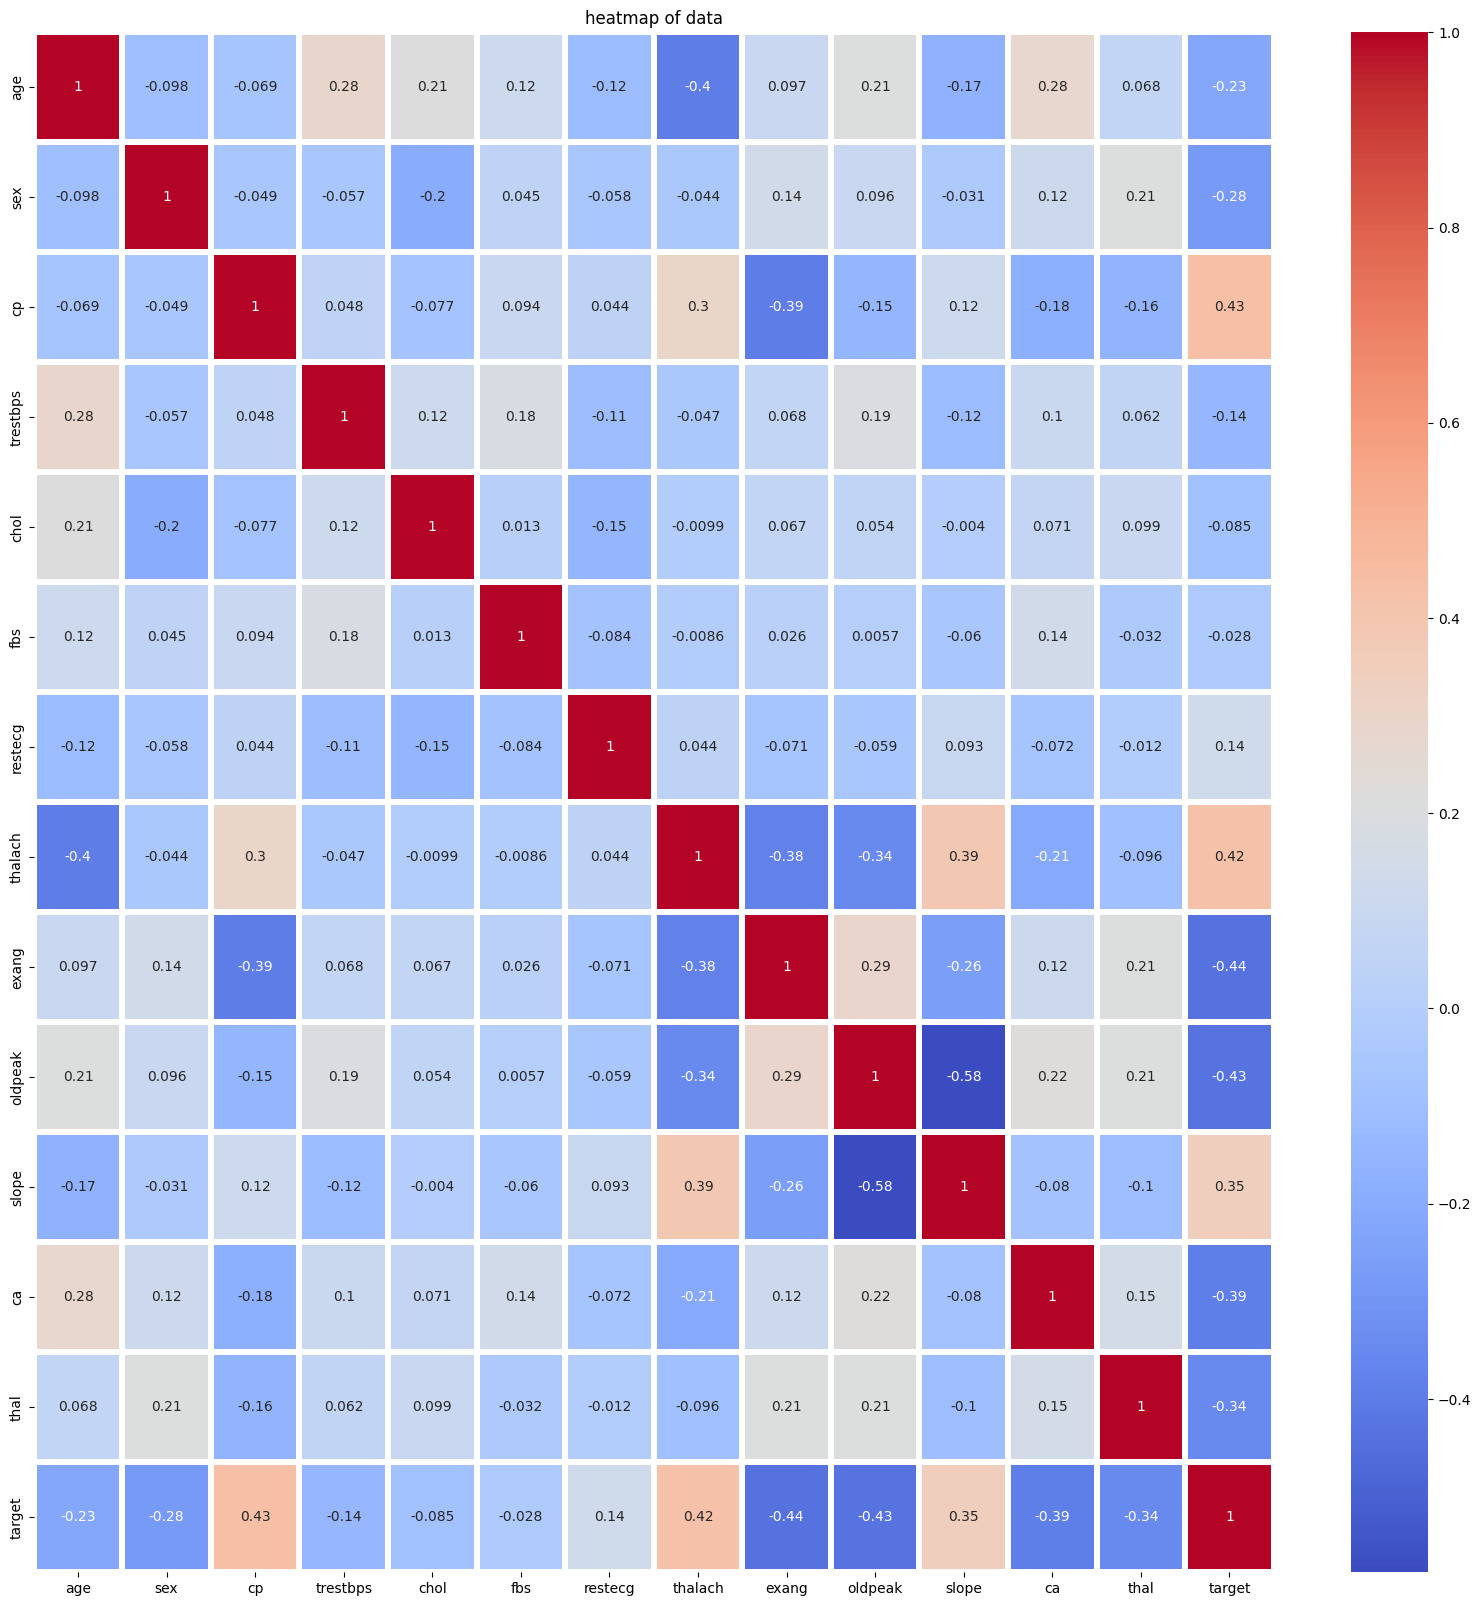

In [8]:
#correlation in heatmap
plt.figure(figsize=(20,20))
sns.heatmap(hd.corr(), annot = True, cmap ='coolwarm', linewidths=4)
plt.title('heatmap of data')
plt.show()

In [9]:
x = hd.drop(['target'], axis=1)
y = hd['target']

In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

<font size="3">Spilit the Dataset into Train & Test.</font>

In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.2 , random_state=5)

In [12]:
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (242, 13)
The shape of y_train is: (242,)
We have m = 242 training examples


In [13]:
print ('The shape of X_test is: ' + str(x_test.shape))
print ('The shape of y_test is: ' + str(y_test.shape))
print ('We have m = %d test examples' % (len(y_test)))

The shape of X_test is: (61, 13)
The shape of y_test is: (61,)
We have m = 61 test examples


<font size="5">Apply the Machine Learning Model's.</font>

<font size="3">Logistic Regression</font>

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import accuracy_score
lr = LogisticRegression(random_state=15, solver='lbfgs', max_iter=10000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9016393442622951


In [15]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.88      0.94      0.91        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<font size="3">Random Forest Classifier</font>

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, criterion = "entropy", random_state = 51)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
accuracy2 = accuracy_score(y_test, rf_pred)
print("Accuracy: ", accuracy2)

Accuracy:  0.8688524590163934


In [17]:
print(classification_report(y_test, rf_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.87      0.87      0.87        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<font size="5">Conclusion</font></br>
- First we import the useful Python Libraries.</br>
- Load the Heart Disease Dataset.</br>
- Create a Correlation HeatMap.</br>
- Apply the Machine Learning model's(Logistic Regression & Random Forest Classifier).</br>
- The Logistic Regression is achieved the 90% accuracy.</br>